In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import seaborn as sns


In [44]:
df1=pd.read_csv("C:\\Users\\Shubh\\OneDrive\\Desktop\\train.csv")

# Train csv file

In [45]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MNIST data for PCA

In [46]:
df1.shape

(42000, 785)

# In "785" Dimension It Is

In [47]:
label=df1["label"]


# Saving the Categorical column in new variable

In [126]:
t=df1.head(5000)

# Taking a small sample from population


In [7]:
t.shape

(5000, 785)

# Its having 5000 rows in 785 dimension

In [48]:
del df1["label"]

# Now deleting the categorical column 

In [127]:
from sklearn.preprocessing import StandardScaler


In [128]:
std=StandardScaler()

# loading StandardScaler for Standardization

In [129]:
pdd=std.fit_transform(t)

#  Column standarization to get rid of scale

In [130]:
ss=pd.DataFrame(pdd)

# storing in dataFrame

In [131]:
t.shape

(5000, 784)

In [132]:
pdd.shape


(5000, 784)

In [133]:
cov_matrix=np.matmul(pdd.T,pdd)


# creating  square matrix

In [134]:
cov_matrix.shape

(784, 784)

In [135]:
values,vectors=eigh(cov_matrix,eigvals=(782,783))


# finding eigen value and eigen vector from 785 dimention to  two dimention where the variance is maximum

In [136]:
vectors.shape

(784, 2)

In [137]:
t.shape


(5000, 784)

In [138]:
projected_data=np.matmul(vectors.T,t.T)


# Now projecting all values in 2 direction 

In [139]:
projected_data.T.shape

(5000, 2)

In [140]:
tyh=pd.DataFrame(projected_data.T)

# converting in Dataframe

In [156]:
tyh["label"]=label

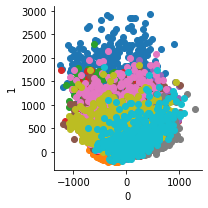

In [142]:
x=sns.FacetGrid(tyh,hue="label")
x.map(plt.scatter,0,1)


# Plotting the points in graph .We can see after taking sample for visualization the points are still overlapping

In [143]:
values,vectores=eigh(cov_matrix)

In [145]:
total=np.sum(values)

# For finding the percentage for information preserving in this sample we calculate total first

In [146]:
values[782]+values[783]

345320.71300059103

# Adding two values where the varince is maximum

In [147]:
(values[782]+values[783])/total

0.10448433071122233

# only 10% information we are preserving.

# Hence its not a good PCA for visualization.

# -------------------------------------------------------------------------------------

In [148]:
t=df1.head(25)

# taking a small sample of 25 datapoints for visualization

In [150]:
pdd=std.fit_transform(t)

In [151]:
ss=pd.DataFrame(pdd)

In [152]:
cov_matrix=np.matmul(pdd.T,pdd)

In [153]:
values,vectors=eigh(cov_matrix,eigvals=(782,783))

In [154]:
projected_data=np.matmul(vectors.T,t.T)

In [155]:
tyh=pd.DataFrame(projected_data.T)

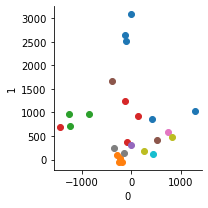

In [157]:
x=sns.FacetGrid(tyh,hue="label")
x.map(plt.scatter,0,1)

# still we are unable to differentiate

In [158]:
values,vectores=eigh(cov_matrix)

In [159]:
total=np.sum(values)

In [160]:
values[782]+values[783]

3260.665790992318

In [161]:
(values[782]+values[783])/total

0.2937536748641728

# Here we are preserving 29% of information.